In [2]:
# Install TensorFlow
!pip install tensorflow-gpu

try:
  %tensorflow_version 2.x  # Colab only.
except Exception:
  pass

import tensorflow as tf
print(tf.__version__)
print(tf.test.gpu_device_name())
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

     |████████████████████████████████| 421.8MB 42kB/s 
     |████████████████████████████████| 450kB 45.7MB/s 
     |████████████████████████████████| 3.8MB 54.6MB/s 
     |████████████████████████████████| 81kB 12.8MB/s 
ERROR: tensorflow 1.15.0 has requirement tensorboard<1.16.0,>=1.15.0, but you'll have tensorboard 2.1.0 which is incompatible.
ERROR: tensorflow 1.15.0 has requirement tensorflow-estimator==1.15.1, but you'll have tensorflow-estimator 2.1.0 which is incompatible.
ERROR: tensorboard 2.1.0 has requirement grpcio>=1.24.3, but you'll have grpcio 1.15.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement google-auth~=1.4.0, but you'll have google-auth 1.10.1 which is incompatible.
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: google-auth 1.4.2
    Uninstalling google-auth-1.4.2:
      Successfully uninstalled goo

`%tensorflow_version` only switches the major version: `1.x` or `2.x`.
You set: `2.x  # Colab only.`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.
2.1.0-rc1
/device:GPU:0
Num GPUs Available:  1


In [3]:
# Load in the data
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print("x_train.shape:", x_train.shape)

11493376/11490434 [==============================] - 0s 0us/step
x_train.shape: (60000, 28, 28)


In [0]:
# Build the model
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dropout(0.2),  
  tf.keras.layers.Dense(10, activation='softmax')
])

In [9]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                2570      
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
________________________________________________

In [0]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
# Train the model
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 93us/sample - loss: 0.0362 - accuracy: 0.9888 - val_loss: 0.0894 - val_accuracy: 0.9804
Epoch 2/10
60000/60000 [==============================] - 5s 91us/sample - loss: 0.0296 - accuracy: 0.9903 - val_loss: 0.0865 - val_accuracy: 0.9814
Epoch 3/10
60000/60000 [==============================] - 5s 88us/sample - loss: 0.0288 - accuracy: 0.9910 - val_loss: 0.0770 - val_accuracy: 0.9825
Epoch 4/10
60000/60000 [==============================] - 5s 88us/sample - loss: 0.0303 - accuracy: 0.9908 - val_loss: 0.0940 - val_accuracy: 0.9800
Epoch 5/10
60000/60000 [==============================] - 5s 88us/sample - loss: 0.0293 - accuracy: 0.9912 - val_loss: 0.0896 - val_accuracy: 0.9808
Epoch 6/10
60000/60000 [==============================] - 5s 91us/sample - loss: 0.0272 - accuracy: 0.9923 - val_loss: 0.0919 - val_accuracy: 0.9825
Epoch 7/10
60000/60000 [==============================] 

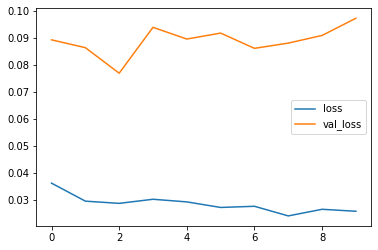

In [15]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()

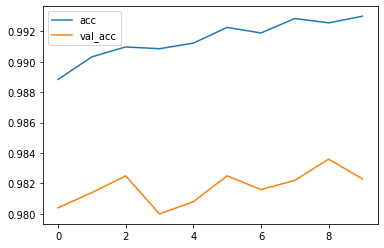

In [16]:
# Plot accuracy per iteration
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()

In [17]:
# Evaluate the model
print(model.evaluate(x_test, y_test))

10000/10000 [==============================] - 1s 69us/sample - loss: 0.0974 - accuracy: 0.9823
[0.0973560100213959, 0.9823]


Confusion matrix, without normalization
[[ 972    1    0    0    0    1    2    0    1    3]
 [   0 1126    2    2    0    2    1    0    2    0]
 [   1    0 1006    5    1    1    0   11    6    1]
 [   0    0    1  996    0    2    0    5    2    4]
 [   0    0    3    0  972    0    2    1    0    4]
 [   2    0    0   10    1  871    4    1    1    2]
 [   2    2    0    1    9    5  937    0    2    0]
 [   0    3    5    0    1    0    0 1009    4    6]
 [   4    2    1    5    1    9    0    2  944    6]
 [   0    2    0    0   14    1    0    2    0  990]]


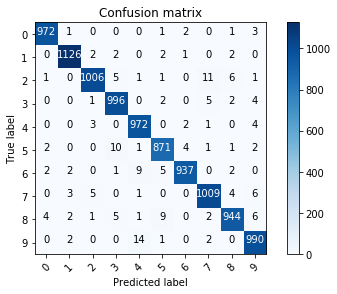

In [19]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

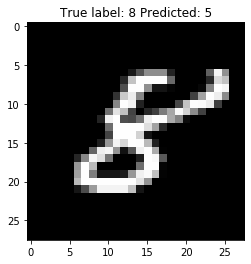

In [20]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]));